
# LAB: Introducción al Clustering. K-Means Clustering 


# ![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR_z4GT2bY3HmLtHlRmRVm1oygMgUUvz6o8ryX3vAMo65iIftAD) 

## Introducción

A esta altura ya sabemos lo que es un proceso de Clusterización, como preparar los datos para realizarlo y como evaluar el análisis de K-Means. Ahora es el momento de poner a prueba nuestras habilidades. Para esta sesión de laboratorio vamos a completar un proceso completo de K-Means usando Python.

Vamos a trabajar con el dataset de cáncer de pecho elaborado por la Universidad de Wisconsin (que ya habíamos usado previamente). Las features fueron calculadas de imágenes digitalizadas de tejido mamario. Describen características de los núcleos celulares en las imágenes.

La idea va a ser encontrar grupos de tejidos similares en función de esas características.



### Ejercicio

### Requerimientos

- Importar los datos
- Realizar una proceso de K-Means para extraer información.
    - Usar Scikit-Learn
- Encontrar el "Silhouette Score" para elvaluar los cluster de análisis.
- Encontrar el k óptimo
- Encontrar los centroides. (Hint: Usar Scikit!)


### Fuentes adicionales

- Un link de [K-Means Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- Sobre Silhouette Score [Silhouette Score Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

====================================================================================================================

## _COMENCEMOS!!!!_

### Sección I: Importar la Data

Importar paquetes y leer el archivo

In [1]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()
df.data.shape

(569, 30)

In [3]:
print(df.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

### Sección II. Estimar clusters utilizando un k = 4

¿Necesitamos normalizar? ¿Pueden tener escalas distintas los features que se usan para calcular distancias?

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.data = scaler.fit_transform(df.data)


In [5]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(df.data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

### Sección II a. Hacer una inspección gráfica de algunos los datos

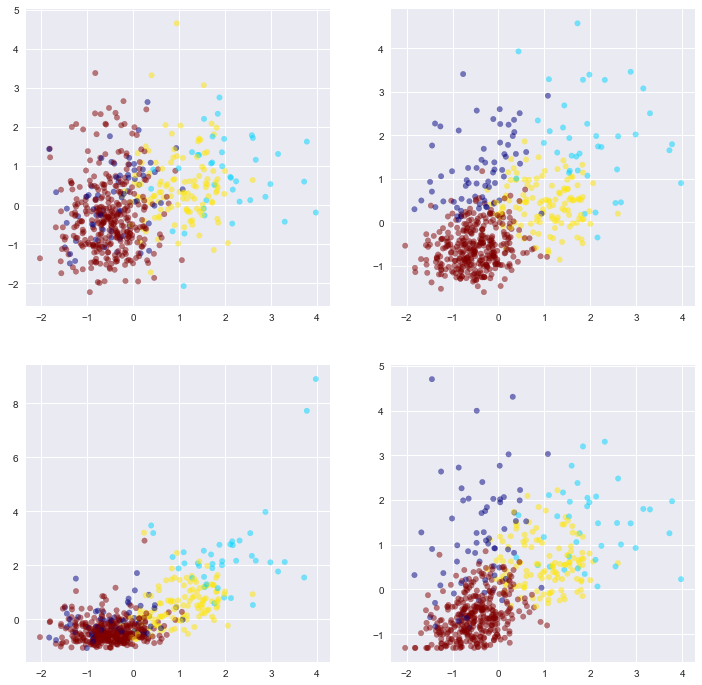

In [7]:
plt.figure(figsize=(12, 12))

ax1=plt.subplot(221)
#puntos
ax1.scatter(df.data[:, 0], df.data[:, 1], c=labels,alpha=0.5,s=30, cmap='jet')
ax1=plt.subplot(222)
ax1.scatter(df.data[:, 0], df.data[:, 5], c=labels,alpha=0.5,s=30, cmap='jet')
ax1=plt.subplot(223)
ax1.scatter(df.data[:, 0], df.data[:, 10], c=labels,alpha=0.5,s=30, cmap='jet')
ax1=plt.subplot(224)
ax1.scatter(df.data[:, 0], df.data[:, 26], c=labels,alpha=0.5,s=30, cmap='jet');

### Sección II b. Realizar una evaluación interna de los clusters

In [8]:
from sklearn.metrics import silhouette_score, calinski_harabaz_score
silhouette_score(df.data, labels)

0.27168663427648826

In [9]:
calinski_harabaz_score(df.data, labels)  

158.67763697815317

** BONUS: ** Investigar algunas otras métricas de evaluación en la [documentación de Scikit-Learn](http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). Calcularlas e interpretarlas.

### Sección III. Hallar el k óptimo

In [10]:
evaluation = []
for k in range(2,9):
    kmeans = KMeans(n_clusters=k, random_state=0) #Como siempre, suele ser una buena práctica fijar la semilla
    kmeans.fit(df.data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    #predY = np.choose(labels, pd.Series(range(0,k+1)).astype(np.int64))
    silhouette = silhouette_score(df.data, labels, metric='euclidean')
    calinsky = calinski_harabaz_score(df.data, labels)      
    evaluation = [k, silhouette, calinsky]
    print("K= ", evaluation)

K=  [2, 0.3433822406907781, 267.6917158605383]
K=  [3, 0.3143840098608098, 197.1140002277671]
K=  [4, 0.27168663427648826, 158.67763697815317]
K=  [5, 0.15995992038716095, 140.3728777195012]
K=  [6, 0.16225631788919712, 128.68892186619425]
K=  [7, 0.1537000543887383, 118.55291323910868]
K=  [8, 0.14440865960853927, 109.64054204382398]


### Sección IV. Teniendo en cuenta el número de clusters óptimo estimado en el punto anterior, ¿qué medida de validación externa podría utilizarse? Realizar las pruebas necesarias

> Dado que se trata de un dataset que intenta clasificar muestras de tejido mamario en "maligno" y "benigno" una posible medida de validación externa podría ser el target del dataset.

In [11]:
kmeans = KMeans(n_clusters=2, random_state=0) #Como siempre, suele ser una buena práctica fijar la semilla
kmeans.fit(df.data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

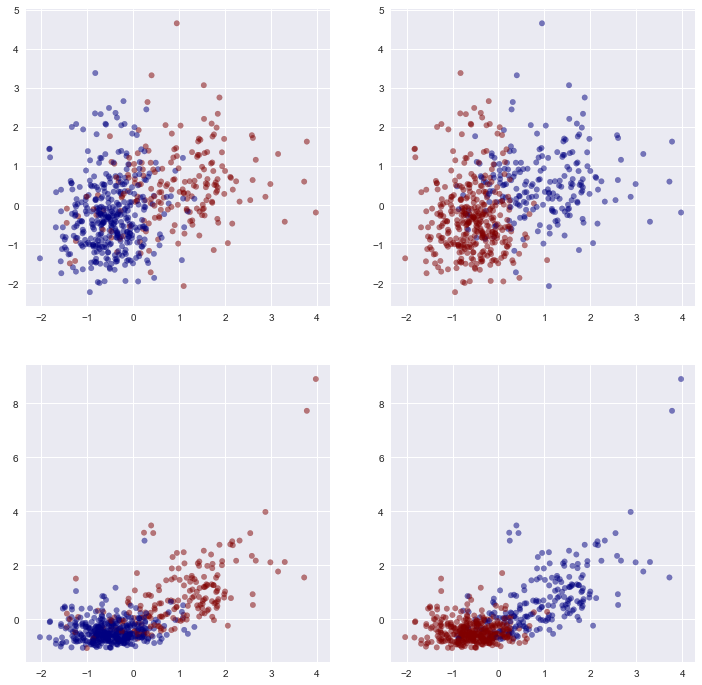

In [12]:
plt.figure(figsize=(12, 12))

ax1=plt.subplot(221)
#puntos
ax1.scatter(df.data[:, 0], df.data[:, 1], c=labels,alpha=0.5,s=30, cmap='jet')
ax1=plt.subplot(222)
ax1.scatter(df.data[:, 0], df.data[:, 1], c=df.target,alpha=0.5,s=30, cmap='jet')
ax1=plt.subplot(223)
ax1.scatter(df.data[:, 0], df.data[:, 10], c=labels,alpha=0.5,s=30, cmap='jet')
ax1=plt.subplot(224)
ax1.scatter(df.data[:, 0], df.data[:, 10], c=df.target,alpha=0.5,s=30, cmap='jet');

Como puede verse, las etiquetas están "invertidas"... los 0's en el target corresponden a "1" en el clustering y viceversa. Procedemos a corregir este punto.

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [14]:
predY = np.choose(labels, [1, 0]).astype(np.int64)

In [15]:
accuracy_score(df.target, predY)

0.9050966608084359

In [16]:
confusion_matrix(df.target, predY)

array([[176,  36],
       [ 18, 339]])